In [1]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 3.1 MB/s 
     |████████████████████████████████| 6.5 MB 52.9 MB/s 
     |████████████████████████████████| 67 kB 6.9 MB/s 
     |████████████████████████████████| 596 kB 29.3 MB/s 
     |████████████████████████████████| 895 kB 63.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Load Pytorch-BERT Model


In [2]:
from transformers import BertTokenizer, BertModel

model_version = 'bert-base-uncased'
model = BertModel.from_pretrained(model_version, output_attentions=True)
tokenizer = BertTokenizer.from_pretrained(model_version)
sentence_a = 'The cat sat on the mat'
sentence_b = "The cat lay on the rug"
inputs = tokenizer.encode_plus(sentence_a, sentence_b, return_tensors='pt')
input_ids = inputs['input_ids']
token_type_ids = inputs['token_type_ids']
attention = model(input_ids, token_type_ids=token_type_ids)[-1]
sentence_b_start = token_type_ids[0].tolist().index(1)

input_id_list = input_ids[0].tolist() # Batch index 0 
tokens = tokenizer.convert_ids_to_tokens(input_id_list)



Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

# See the Inputs of BERT

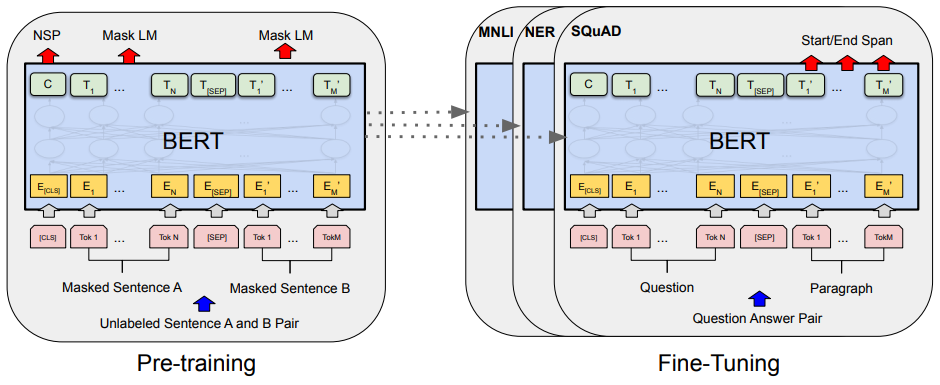

In [3]:
inputs

{'input_ids': tensor([[  101,  1996,  4937,  2938,  2006,  1996, 13523,   102,  1996,  4937,
          3913,  2006,  1996, 20452,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [4]:
print("input_ids: \n\n",input_ids)
print("\ninput_ids.size(): \n\n",input_ids.size())


input_ids: 

 tensor([[  101,  1996,  4937,  2938,  2006,  1996, 13523,   102,  1996,  4937,
          3913,  2006,  1996, 20452,   102]])

input_ids.size(): 

 torch.Size([1, 15])


In [5]:
print("token_type_ids: \n\n", token_type_ids)

print("\ntoken_type_ids.size(): \n\n",token_type_ids.size())

token_type_ids: 

 tensor([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]])

token_type_ids.size(): 

 torch.Size([1, 15])


In [6]:
print("attention_mask: \n\n", inputs['attention_mask'])

print("\ninputs['attention_mask'].size(): \n\n",inputs['attention_mask'].size())

attention_mask: 

 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

inputs['attention_mask'].size(): 

 torch.Size([1, 15])


# Configuration of BERT


> BERT base, which is a BERT model consists of 12 layers of Transformer encoder, 12 attention heads, 768 hidden size, and 110M parameters.

> BERT large, which is a BERT model consists of 24 layers of Transformer encoder,16 attention heads, 1024 hidden size, and 340 parameters.*이탤릭체 텍스트*




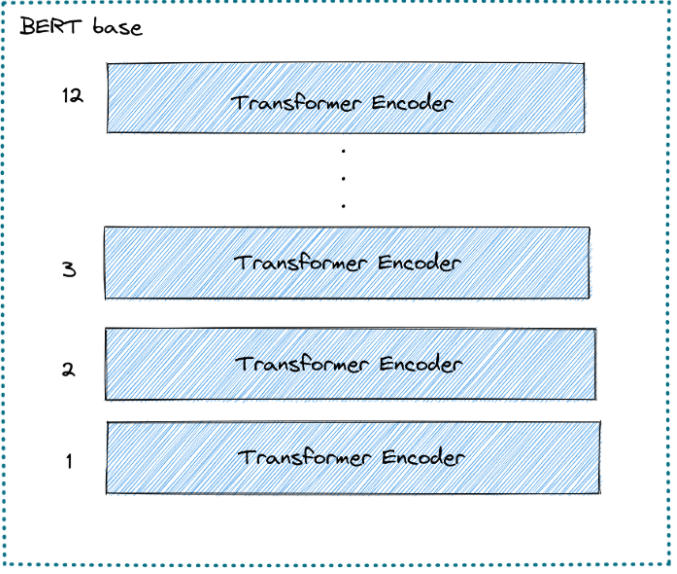


In [7]:
print(model)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

# Text Classification with BERT (PyTorch)

We're going to use the **BBC News Classification dataset(Kaggle)** 

The dataset: **2126 different texts**, 
each labeled under one of **5 categories: entertainment, sport, tech, business, or politics**





---


**You should download the bbc-dataset corpus data from here.**

 https://www.kaggle.com/sainijagjit/bbc-dataset

In [9]:
import pandas as pd

datapath = 'bbc-text.csv'
df = pd.read_csv(datapath)
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [10]:
df.groupby(['category']).size()

#df.groupby(['category']).size().plot.bar()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
dtype: int64

In [11]:
from transformers import BertTokenizer

#tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

example_text = 'I will watch Memento tonight'
bert_input = tokenizer(example_text,padding='max_length', max_length = 10, 
                       truncation=True, return_tensors="pt")


print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])

tensor([[  101,  1045,  2097,  3422,  2033, 23065,  3892,   102,     0,     0]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])


---
Here is the explanation of **BertTokenizer** parameters above:

- **padding** : to pad each sequence to the maximum length that you specify.


- **max_length** : the maximum length of each sequence. In this example we use 10, but for our actual dataset we will use 512, which is the maximum length of a sequence allowed for BERT.

- **truncation** : if True, then the tokens in each sequence that exceed the maximum length will be truncated.

- **return_tensors** : the type of tensors that will be returned. Since we’re using Pytorch, then we use pt. If you use Tensorflow, then you need to use tf .
---

As you can see, the **BertTokenizer** takes care of all of the necessary transformations of the input text such that it’s ready to be used as an input for our BERT model adds [CLS], [SEP], and [PAD] tokens automatically.

In [12]:
example_text = tokenizer.decode(bert_input.input_ids[0])

print(example_text)

[CLS] i will watch memento tonight [SEP] [PAD] [PAD]


### Dataset Class



In [13]:
import torch
import numpy as np




tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

labels = {'business':0,
          'entertainment':1,
          'sport':2,
          'tech':3,
          'politics':4
          }



class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['category']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['text']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y


Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

**What is np.random.seed()?** 

난수의 생성 패턴을 동일하게 하여 random성에 의한 성능 개선을 막아 주므로 내가 짠 알고리즘 혹은 모델의 순수 성능을 파악할 수 있습니다.   

In [14]:
np.random.seed(307)

df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42),[int(.8*len(df)), int(.9*len(df))])

print(len(df_train), len(df_val), len(df_test))

1780 222 223


# BERT Model Building

If your dataset is **not in English**, it would be best if you use **bert-base-multilingual-cased** model.

In [15]:
from torch import nn #neural network 
from transformers import BertModel 

class BertClassifier(nn.Module):

  def __init__(self, dropout=0.5): 

    super(BertClassifier, self).__init__() #nn.Module에 구현된 init()을 상속받아 사용하겠다는 의미

    self.bert = BertModel.from_pretrained('bert-base-cased') 
    self.dropout = nn.Dropout(dropout)
    self.linear = nn.Linear(768, 5) #Embedding vector size를 768으로, output label을 5로 targeting
    self.relu = nn.ReLU() #Activation Function인 ReLU를 Baseline으로 사용하며 다른 걸 써도 됨  

  def forward(self, input_id, mask):

    _, pooled_output = self.bert(input_ids = input_id, attention_mask=mask, return_dict=False)
    dropout_output = self.dropout(pooled_output)
    linear_output = self.linear(dropout_output)
    final_layer = self.relu(linear_output)

    return final_layer

## Training Loop 
Train the model with a **standard PyTorch training loop**


Hyper-parameters:

- optimizer: Adam 
- learning rate: 1e-6 
- loss function: categorical cross entropy **(good at dealing with multi-class classification)**


In [16]:
from torch.optim import Adam 
from tqdm import tqdm # Work-progress bar on Python

def train(model, train_data, val_data, learning_rate, epochs):

  train, val = Dataset(train_data), Dataset(val_data)

  train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
  val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

  use_cuda = torch.cuda.is_available() 
  device = torch.device("cuda" if use_cuda else "cpu")

  criterion = nn.CrossEntropyLoss() 
  optimizer = Adam(model.parameters(), lr = learning_rate)

  if use_cuda:

    model = model.cuda() 
    criterion = criterion.cuda() 

  for epoch_num in range(epochs):
    total_acc_train = 0 
    total_loss_train = 0 

    for train_input, train_label in tqdm(train_dataloader):

      train_label = train_label.to(device)
      mask = train_input['attention_mask'].to(device)
      input_id = train_input['input_ids'].squeeze(1).to(device)

      output = model(input_id, mask)

      batch_loss = criterion(output, train_label)
      total_loss_train += batch_loss.item() 

      acc = (output.argmax(dim=1) == train_label).sum().item() 
      total_acc_train += acc 

      model.zero_grad()
      batch_loss.backward()
      optimizer.step() 

    total_acc_val = 0
    total_loss_val = 0 

    with torch.no_grad():


      for val_input, val_label in val_dataloader:

        val_label = val_label.to(device)
        mask = val_input['attention_mask'].to(device)
        input_id = val_input['input_ids'].squeeze(1).to(device)

        output = model(input_id, mask)

        batch_loss = criterion(output, val_label)
        total_loss_val += batch_loss.item() 

        acc = (output.argmax(dim=1) == val_label).sum().item() 
        total_acc_val += acc 
      
      print(
          f'Epochs: {epoch_num +1} | Train Loss: {total_loss_train / len(train_data): .3f}\
          | Train Accuracy: {total_acc_train / len(train_data): .3f} \
          | Val Loss: {total_loss_val / len(val_data): .3f} \
          | Val Accuracy: {total_acc_val / len(val_data): .3f}'
      )

EPOCHS = 5
model = BertClassifier() 
LR =1e-6 

train(model, df_train,df_val, LR, EPOCHS)


Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 890/890 [03:14<00:00,  4.58it/s]


Epochs: 1 | Train Loss:  0.780          | Train Accuracy:  0.289           | Val Loss:  0.622           | Val Accuracy:  0.595


100%|██████████| 890/890 [03:25<00:00,  4.34it/s]


Epochs: 2 | Train Loss:  0.363          | Train Accuracy:  0.878           | Val Loss:  0.190           | Val Accuracy:  0.977


100%|██████████| 890/890 [03:24<00:00,  4.34it/s]


Epochs: 3 | Train Loss:  0.142          | Train Accuracy:  0.974           | Val Loss:  0.093           | Val Accuracy:  0.982


100%|██████████| 890/890 [03:24<00:00,  4.35it/s]


Epochs: 4 | Train Loss:  0.073          | Train Accuracy:  0.985           | Val Loss:  0.065           | Val Accuracy:  0.991


100%|██████████| 890/890 [03:24<00:00,  4.35it/s]


Epochs: 5 | Train Loss:  0.044          | Train Accuracy:  0.992           | Val Loss:  0.042           | Val Accuracy:  0.991


# Evaluate Model on Test Data

- Use the test data to evaluate the model's performance on unseen dataset!



In [19]:
def evaluate(model, test_data): 

   test = Dataset(test_data)

   test_dataloader = torch.utils.data.DataLoader(test, batch_size =2)

   use_cuda = torch.cuda.is_available() 
   device = torch.device("cuda" if use_cuda else "cpu")

   if use_cuda: 

     model = model.cuda()

   total_acc_test = 0 
   with torch.no_grad():

     for test_input, test_label in test_dataloader: 

       test_label = test_label.to(device)
       mask = test_input['attention_mask'].to(device) 
       input_id = test_input['input_ids'].squeeze(1).to(device) 

       output = model(input_id, mask)

       acc = (output.argmax(dim=1) == test_label).sum().item() 
       total_acc_test += acc
   print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')

evaluate(model, df_test) 




Test Accuracy:  0.996
